In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


In [2]:
import tensorflow as tf

In [3]:
x_data = np.linspace(0.0, 10.0, 1000000)

In [4]:
noise = np.random.randn(len(x_data))

In [5]:
noise

array([-1.07937917, -0.52153369, -0.1940324 , ...,  1.89062858,
       -1.40683371,  0.85065519])

#### Lets assume the eq : y =mx +b
m = 0.5
b = 5

In [6]:
y_true = (0.5 * x_data) + 5 + noise

In [7]:
len(y_true)

1000000

In [10]:
x_df = pd.DataFrame(data=x_data, columns = ['X_data'])

In [11]:
x_df.head()

,X_data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [12]:
y_df = pd.DataFrame(data=y_true, columns=['Y'])

In [13]:
y_df.head()

,Y
0,3.920621
1,4.478471
2,4.805978
3,5.170308
4,5.841825


In [14]:
my_data = pd.concat([x_df,y_df], axis=1)

In [16]:
my_data.head()

,X_data,Y
0,0.00000,3.920621
1,0.00001,4.478471
2,0.00002,4.805978
3,0.00003,5.170308
4,0.00004,5.841825


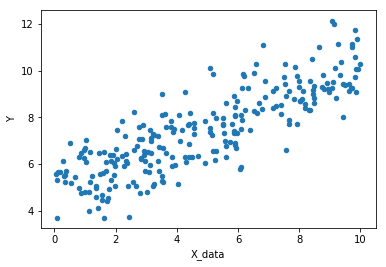

In [22]:
my_data.sample(n=250).plot(kind='scatter',x='X_data',y='Y')

In [23]:
np.random.randn(2)

array([-1.88696167, -0.92770184])

In [25]:
batch_size = 10

y =mx + b

In [24]:
m = tf.Variable(-1.88)
b = tf.Variable(-0.92)

In [28]:
xph = tf.placeholder(tf.float32, [batch_size])

In [29]:
yph = tf.placeholder(tf.float32, [batch_size])

In [30]:
y_model = m*xph + b

In [32]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [33]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

In [34]:
train = optimizer.minimize(error)

In [35]:
#initialize the variables and define operations
init = tf.global_variables_initializer()

In [37]:
with tf.Session() as sess:
    sess.run(init)
    batches = 1000
    for i in range(batches):
        rand_int = np.random.randint(len(x_data), size=batch_size)
        feed = {xph:x_data[rand_int], yph:y_true[rand_int]}
        sess.run(train,feed_dict=feed)
    model_m, model_b = sess.run([m,b])

In [38]:
model_m #it should be close to 0.5 as we has assumed earlier

0.4668794

In [39]:
model_b #it should be close to 5 as we has assumed earlier

4.8996763

In [40]:
y_hat = x_data*model_m + model_b

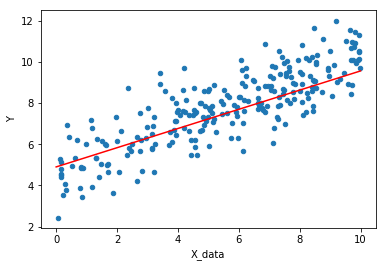

In [41]:
my_data.sample(250).plot(kind='scatter', x="X_data", y = "Y")
plt.plot(x_data, y_hat, 'r')